**Agata Semerjak**, 402426  
gr 3a, środa 17:00

## Binary logistic regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
import os
path = os.getcwd() + '/ex2data1.txt'
data = pd.read_csv(path, header=None, names=['Exam 1', 'Exam 2', 'Admitted'])
data.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [2]:
data.describe()

,Exam 1,Exam 2,Admitted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


In [3]:
data.insert(0, 'Ones', np.ones(len(data))) #adding column of ones at the beggining
X = data.drop(['Admitted'], axis=1) #separating independent variables
y = data[['Admitted']] #separating dependent variable
print(X.head(), "\n")
print(y.head())

   Ones     Exam 1     Exam 2
0   1.0  34.623660  78.024693
1   1.0  30.286711  43.894998
2   1.0  35.847409  72.902198
3   1.0  60.182599  86.308552
4   1.0  79.032736  75.344376 

   Admitted
0         0
1         0
2         0
3         1
4         1


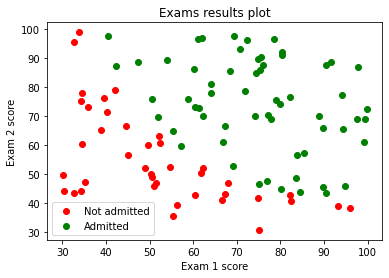

In [4]:
X = np.array(X.values) #converting dfs to matrixes
y = np.array(y.values)
for i in range(len(X)): #plotting the data on 2D plot
    if y[i] == 0:
        if i == 0:
            plt.scatter(X[i][1], X[i][2], c="r", label="Not admitted")
        else:
            plt.scatter(X[i][1], X[i][2], c="r")
    else:
        if i == 3:
            plt.scatter(X[i][1], X[i][2], c="g", label="Admitted")
        else:
            plt.scatter(X[i][1], X[i][2], c="g")
plt.legend()
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.title("Exams results plot")
plt.show()

In [5]:
def sig(t): #the signum function
    return 1/(1 + np.exp(-t))

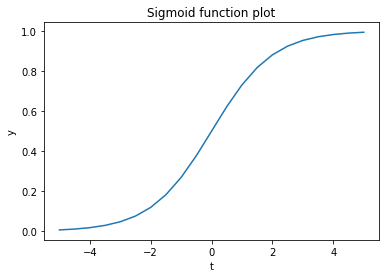

In [6]:
t = np.arange(-5, 5.5, 0.5)
plt.plot(t, sig(t)) #plotting the signum function
plt.xlabel("t")
plt.ylabel("y")
plt.title("Sigmoid function plot")
plt.show()

In [7]:
def cost(theta, X, y):
    m = len(X)
    h = sig(X @ theta)
    J = ((-y.T)@np.log(h) - (1-y).T@(np.log(1-h)))/m
    return J[0]

theta = np.zeros(3) #initalizing theta

print("Cost function for zero theta:", cost(theta, X, y))

Cost function for zero theta: 0.6931471805599452


In [8]:
def simple_gradient(X, y, theta, alpha, it):
    m = len(X)
    theta = theta.reshape((3, 1))
    for _ in range(it):
        theta = theta - alpha/m * (X.T @ (sig(X @ theta) - y)) #updating theta
        #theta = theta - alpha/m * ((sig(X @ theta) - y).T @ X) #updating theta
    c = cost(theta, X, y)
    return theta, c

def normalize(X):
  meanx = X.mean(axis=0) #computing mean of each column
  sigmax = X.std(axis=0) #computing std for each column
  X_normalized = X.copy()
  X_normalized[:, 1:] = np.multiply((X[:, 1:] - meanx[1:]), 1/sigmax[1:]) #normalizing the data
  return meanx, sigmax, X_normalized

meanx, sigmax, X_norm = normalize(X)

better_theta, c = simple_gradient(X_norm, y, theta, 1, 150)
print("Theta values:\n", better_theta, "\n\nCost function value:", c)

Theta values:
 [[1.41957362]
 [3.35941597]
 [3.11271333]] 

Cost function value: [0.20640714]


In [9]:
y_pred = sig(X_norm @ better_theta) #predicting the values according to computed theta
y_pred = y_pred[:, 0] #preparing the size for further operations
y_pred_bool = (y_pred >= 0.5).astype(int) #setting the threshold to 0.5 and converting predicted values to zeros and ones
y = y[:, 0]
print("Actual values:   ", y)
print("\nPredicted values:", y_pred_bool)

Actual values:    [0 0 0 1 1 0 1 1 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0 1 1 1 0 0 0 1 1 0 1 0 0 0
 1 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1
 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1]

Predicted values: [0 0 0 1 1 0 1 0 1 1 1 0 1 1 0 1 0 0 1 1 0 1 0 0 1 1 1 1 0 0 1 1 0 0 0 0 1
 1 0 0 1 0 1 1 0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1 1 1
 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 0 1]


Confusion matrix:
 [[34  6]
 [ 5 55]]

True Positives:  34
True Negatives:  55
False Positives:  6
False Negatives:  5

True predictions:  89
False predictions:  11
Accuracy:  89.0 %


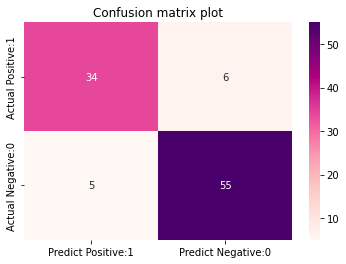

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
m = confusion_matrix(y, y_pred_bool)

print('Confusion matrix:\n', m)
print('\nTrue Positives: ', m[0, 0])
print('True Negatives: ', m[1, 1])
print('False Positives: ', m[0, 1])
print('False Negatives: ', m[1, 0])
print("\nTrue predictions: ", m[0, 0] + m[1, 1])
print("False predictions: ", m[0, 1] + m[1, 0])
print("Accuracy: ", (m[0, 0] + m[1, 1])/np.sum(m) * 100, "%")

cm_matrix = pd.DataFrame(data=m, index=['Actual Positive:1', 'Actual Negative:0'], columns=['Predict Positive:1', 'Predict Negative:0']) #plotting the confusion matrix

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='RdPu')
plt.title("Confusion matrix plot")
plt.show()

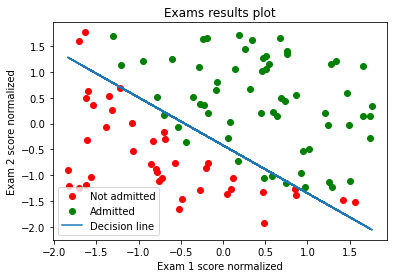

In [11]:
for i in range(len(X)):
    if y[i] == 0:
        if i == 0:
            plt.scatter(X_norm[i][1], X_norm[i][2], c="r", label="Not admitted")
        else:
            plt.scatter(X_norm[i][1], X_norm[i][2], c="r")
    else:
        if i == 3:
            plt.scatter(X_norm[i][1], X_norm[i][2], c="g", label="Admitted")
        else:
            plt.scatter(X_norm[i][1], X_norm[i][2], c="g")

c = -better_theta[0] / better_theta[1]
m1 = -better_theta[2] / better_theta[1]

plt.plot(X_norm[:, 1], m1*X_norm[:, 1] + c, label = "Decision line") #plotting the data with decision line on it
plt.legend()
plt.xlabel("Exam 1 score normalized")
plt.ylabel("Exam 2 score normalized")
plt.title("Exams results plot")
plt.show()

## Logistic regression - Python

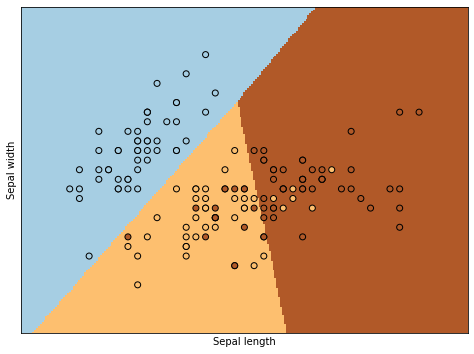

In [12]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn import datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

# Create an instance of Logistic Regression Classifier and fit the data.
logreg = LogisticRegression(penalty="l2", C=1e4)
logreg.fit(X, Y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])
 
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(8, 6))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
 
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
 
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
 
plt.show()

In [13]:
pp = logreg.predict_proba(X)
print("Average probability of belonging to every class:", np.mean(pp, axis=0))

Average probability of belonging to every class: [0.33333206 0.33332895 0.33333898]


Confusion matrix:
 [[50  0  0]
 [ 0 38 12]
 [ 0 13 37]]


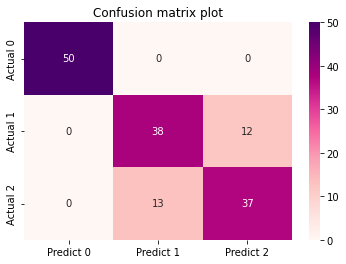

In [14]:
Z = logreg.predict(X)
m = confusion_matrix(Y, Z)

print('Confusion matrix:\n', m)

cm_matrix = pd.DataFrame(data=m, index=['Actual 0', 'Actual 1', 'Actual 2'], columns=['Predict 0', 'Predict 1', 'Predict 2'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='RdPu')
plt.title("Confusion matrix plot")
plt.show()

In [15]:
print("Mean accuracy on the data and labels", logreg.score(X, Y))

Mean accuracy on the data and labels 0.8333333333333334


In [16]:
from sklearn.metrics import classification_report
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(Y, Z, target_names=target_names))

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00        50
     class 1       0.75      0.76      0.75        50
     class 2       0.76      0.74      0.75        50

    accuracy                           0.83       150
   macro avg       0.83      0.83      0.83       150
weighted avg       0.83      0.83      0.83       150

